# Standard slicing

This is not the standard use of this module.
This is only a guide for consuming as an API and to develop from it.

## Surface slicing: From shed coordinates

Creates the section by defining two arbitrary points.
These points are used to create an abstract shed used to initialize the section object.
The order of these points matter, in a way that the section normal is going to be defined by and orthogonal direction from the vector that connects the first to the second arbitrary points.

In [3]:
from cfdmod.use_cases.altimetry import AltimetrySection, Shed
import trimesh
import numpy as np

surface_mesh: trimesh.Trimesh = trimesh.load_mesh("./fixtures/tests/altimetry/terrain.stl")

shed_start = np.array([193, 167, 830], dtype=np.float32)
shed_end = np.array([65.9, 167, 830], dtype=np.float32)

shed = Shed(start_coordinate=shed_start, end_coordinate=shed_end, shed_label="default")

altimetry_section = AltimetrySection.from_points("example", shed_start, shed_end)
altimetry_section.slice_surface(surface_mesh)
altimetry_section.include_shed(shed)

surface_mesh, "Shed section profile:", altimetry_section.section_shed_profiles["default"][
    0
], "Section profile:", altimetry_section.section_vertices.pos[:10]

(<trimesh.Trimesh(vertices.shape=(18899, 3), faces.shape=(37304, 3))>,
 'Shed section profile:',
 array([773.1893645 , 773.1893645 , 900.28936298, 900.28936298]),
 'Section profile:',
 array([[-966.09736914,  167.        ,  855.10865749],
        [-962.98798518,  167.        ,  855.01024001],
        [-955.67935982,  167.        ,  854.75110316],
        [-951.70151381,  167.        ,  854.44965002],
        [-942.15206599,  167.        ,  853.57271115],
        [-936.06816609,  167.        ,  853.05939951],
        [-928.73314296,  167.        ,  852.44986723],
        [-918.48714138,  167.        ,  851.78153494],
        [-916.3657208 ,  167.        ,  851.65032959],
        [-911.38540774,  167.        ,  851.55485013]]))

## Surface slicing: From plane description

There is also a method for initializing the section from the section plane origin and normal direction.

In [4]:
plane_normal = np.array([1, 0, 0])
plane_origin = np.array([0, 0, 820])

new_section = AltimetrySection("example", plane_origin, plane_normal)
new_section.slice_surface(surface_mesh)

surface_mesh, "Section profile:", new_section.section_vertices.pos[:10]

(<trimesh.Trimesh(vertices.shape=(18899, 3), faces.shape=(37304, 3))>,
 'Section profile:',
 array([[ 0.00000000e+00, -9.66099976e+02,  7.68707400e+02],
        [ 0.00000000e+00, -9.59489405e+02,  7.70201331e+02],
        [ 0.00000000e+00, -9.55827725e+02,  7.70990272e+02],
        [ 0.00000000e+00, -9.44357497e+02,  7.73947109e+02],
        [ 0.00000000e+00, -9.43097560e+02,  7.74278039e+02],
        [ 0.00000000e+00, -9.41684198e+02,  7.74748996e+02],
        [ 0.00000000e+00, -9.28990673e+02,  7.79015915e+02],
        [ 8.88178420e-16, -9.24571502e+02,  7.81001443e+02],
        [ 0.00000000e+00, -9.16503535e+02,  7.84776440e+02],
        [ 0.00000000e+00, -9.12040002e+02,  7.87014302e+02]]))

## Plotting

When using the code from this notebook, it is required to implement the logic to save the image since only the plotting is performed

### Altimetry profiles plotting

Altimetry profiles are 2D plots of the section and the buildings cut by it.
For the altimetry profile, there must be at least one building cut by it.

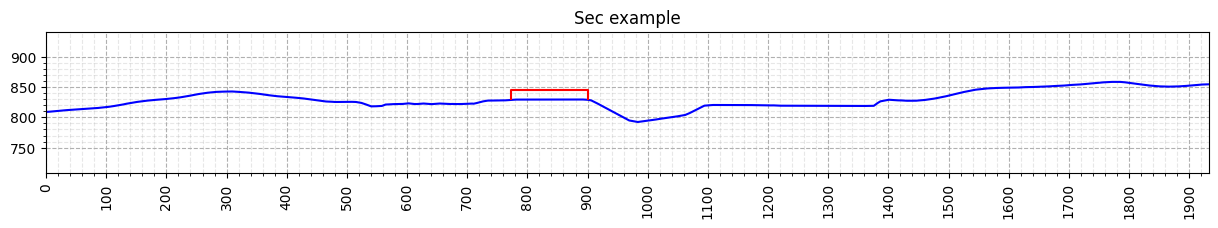

In [6]:
from cfdmod.use_cases.altimetry.plots import plot_surface, plot_profiles, plot_altimetry_profiles
import matplotlib.pyplot as plt

fig, ax = plot_altimetry_profiles(altimetry_section)
plt.show(fig)
plt.close(fig)

### Surface plot: DEBUG

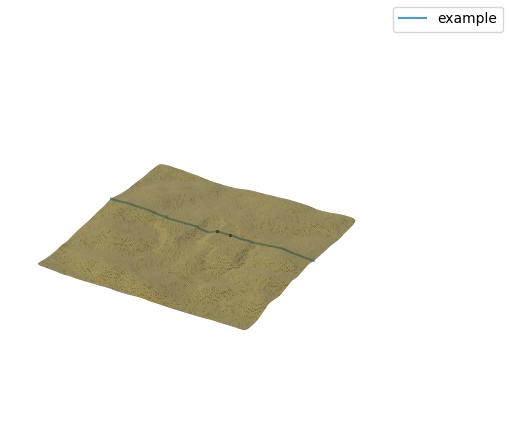

In [8]:
fig, ax = plot_surface(surface_mesh, [altimetry_section])
plt.show(fig)
plt.close(fig)

### Profiles plotting: DEBUG

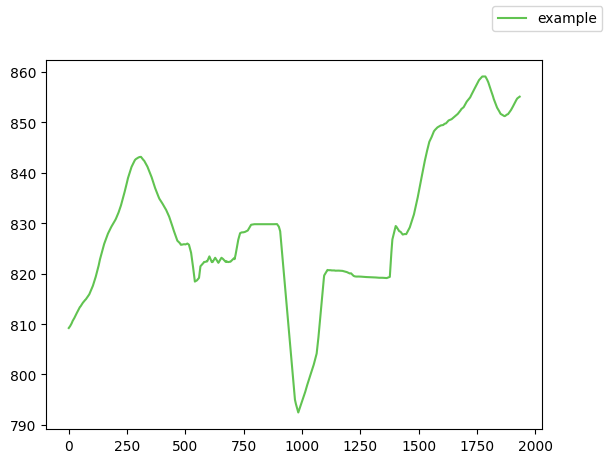

In [9]:
fig, ax = plot_profiles([altimetry_section])
plt.show(fig)
plt.close(fig)